In [13]:
%pip install -r requirements.txt
%pip install -e .

Note: you may need to restart the kernel to use updated packages.
Obtaining file:///Users/arjunraj/code/l-metric
  Preparing metadata (setup.py) ... done
  Attempting uninstall: l-metric-calculator
    Found existing installation: l-metric-calculator 0.1.0
    Uninstalling l-metric-calculator-0.1.0:
      Successfully uninstalled l-metric-calculator-0.1.0
  Running setup.py develop for l-metric-calculator
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pprint
import pandas as pd
from l_metric_calculator.l_metric_calculator import LMetricCalculator

/var/folders/nz/4qmybzbj3nsfhgp1q_7dxz8h0000gn/T/ipykernel_2676/392476187.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the gene expression data
df = pd.read_csv('output_file.csv')
df.head()


,Ada,Add3,Adh6a,Agr2,Ahnak,Aldh1b1,Aldob,Alpi,Ang4,Anxa1,...,Tff3,Tm4sf20,Tm4sf4,Tph1,Tuba1a,Txndc5,Vim,Yap1,Zfp36l2,Zg16
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,23,0,0,0,0,6,...,0,0,1,0,0,0,0,2,1,0
2,0,0,0,0,38,1,1,0,0,36,...,0,0,11,1,0,0,0,0,0,0
3,4,0,0,0,20,0,0,0,0,0,...,0,0,4,0,0,0,0,2,1,0
4,0,0,0,0,188,0,1,0,0,0,...,0,0,176,2,0,0,1,5,1,0


In [4]:

# Initialize the LMetricCalculator with the DataFrame
calculator = LMetricCalculator(df)


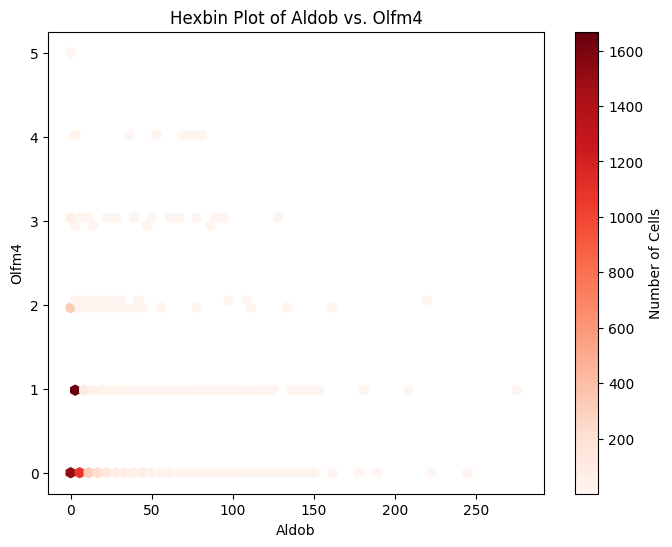

In [5]:
calculator.plot_hexbin('Aldob', 'Olfm4')

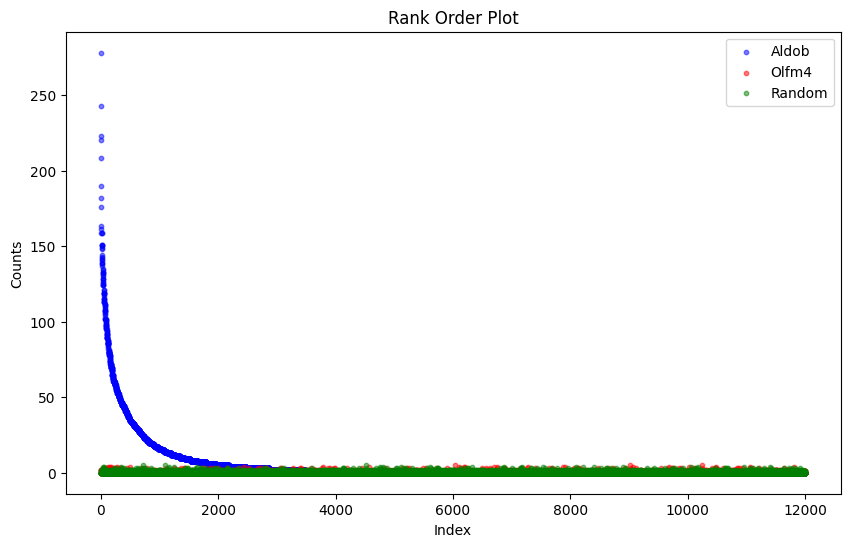

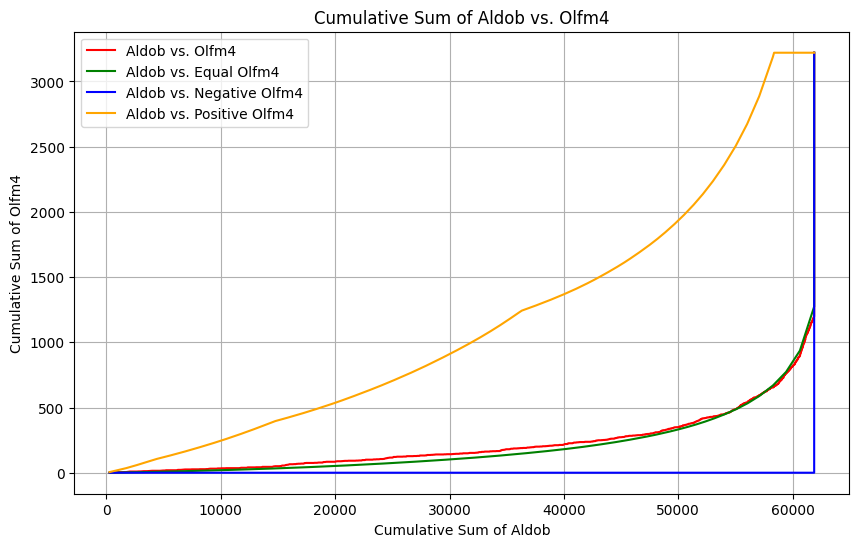

In [6]:
calculator.plot_rank_orders('Aldob', 'Olfm4')

In [7]:

# Compute pairwise L-Metrics for all genes
calculator.compute_pairwise_l_metrics()
pprint.pprint(calculator.l_metric_matrix.head())


Computing Pairwise L-Metrics: 100%|██████████| 19460/19460 [00:28<00:00, 686.56it/s]

            Ada      Add3     Adh6a      Agr2     Ahnak   Aldh1b1     Aldob  \
Ada    0.000000 -0.098909  0.023412 -0.230143 -0.436958 -0.201786  0.360102   
Add3  -0.221878  0.000000  0.108601  0.057701  0.052622  0.126960  0.165073   
Adh6a  0.006826  0.087802  0.000000  0.016614  0.073153  0.100663  0.158645   
Agr2  -0.184639  0.070594  0.007202  0.000000 -0.185003  0.047945  0.097708   
Ahnak -0.589486  0.026829  0.078425 -0.407864  0.000000  0.134928 -0.680004   

           Alpi      Ang4     Anxa1  ...      Tff3   Tm4sf20    Tm4sf4  \
Ada    0.353118 -0.196254 -0.452306  ...  0.035054  0.267850  0.440339   
Add3   0.113868  0.025526  0.021279  ...  0.036122  0.124935  0.075261   
Adh6a  0.100692  0.041968  0.072875  ...  0.019615  0.134605  0.043232   
Agr2   0.006679  0.100890 -0.459631  ...  0.559340  0.042857  0.057027   
Ahnak -0.551553  0.168164  0.399344  ...  0.020171 -0.480042 -0.162530   

           Tph1    Tuba1a    Txndc5       Vim      Yap1   Zfp36l2      Zg16  
Ad

In [8]:

# Perform hierarchical clustering using the average linkage method and Euclidean distance
calculator.perform_clustering(method='average', metric='euclidean')

# Plot the interactive clustered heatmap
calculator.plot_heatmap(interactive=True)

# Playground below

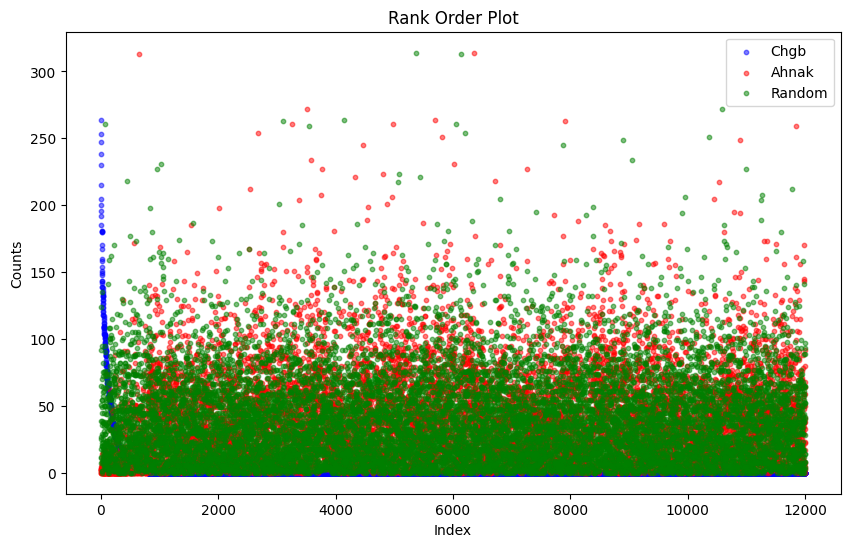

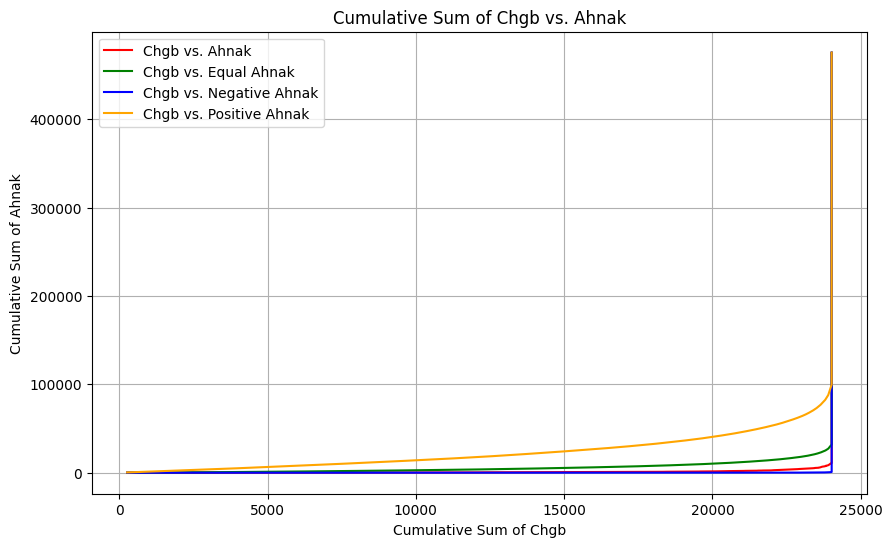

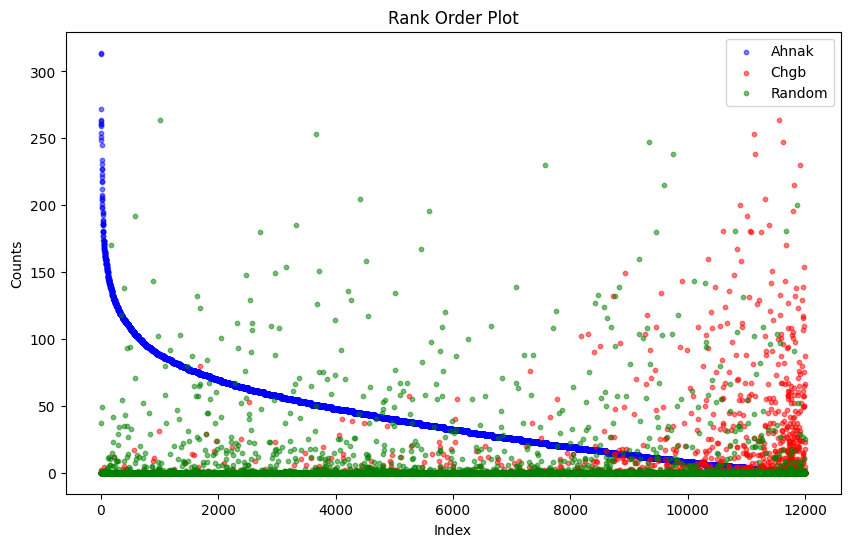

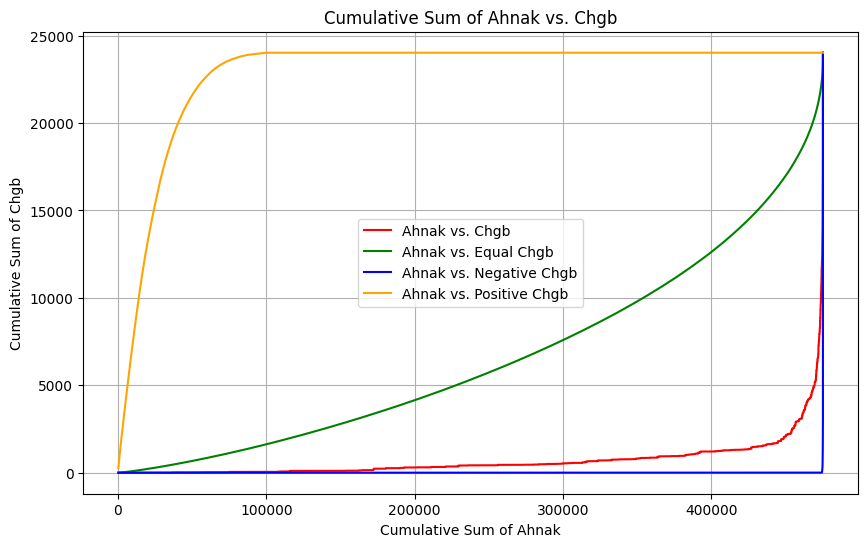

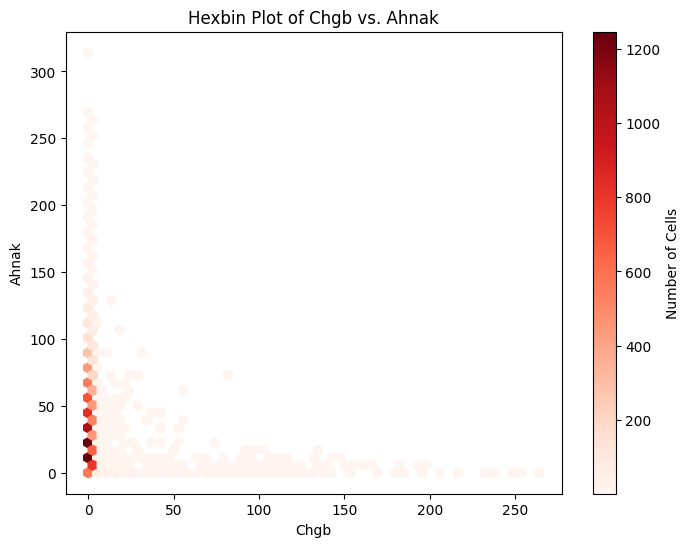

In [8]:
# plot the rank orders for chgb and ahnak
calculator.plot_rank_orders('Chgb', 'Ahnak')
# reverse order of rows
calculator.plot_rank_orders('Ahnak', 'Chgb')

calculator.plot_hexbin('Chgb', 'Ahnak')



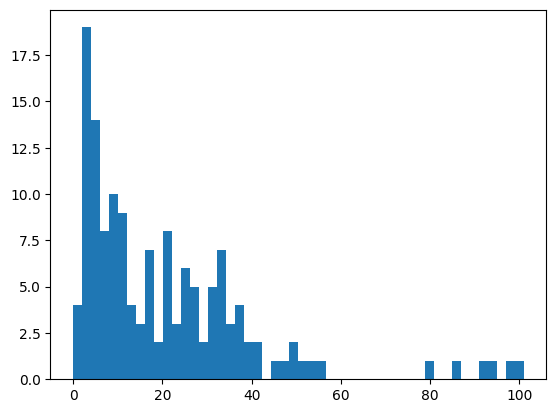

Zg16       101
Chgb        97
Reg4        93
Chga        91
Cck         86
          ... 
Adh6a        3
Nlrp6        2
Guca2a       1
Aldh1b1      1
Gstm3        0
Length: 140, dtype: int64
Alpi 31
Chga 91
Lyz1 3
Muc2 13
Lgr5 8
Olfm4 9
Dclk1 4
Mki67 22
Clu 35
Msln 28


In [12]:
import matplotlib.pyplot as plt
# For each column, find the number of elements below -0.05

df = calculator.l_metric_matrix.apply(lambda col: (col < -0.05).sum())

# Then make a histogram of that number
plt.hist(df, bins=50)
plt.show()

# Now sort the dataframe by the number of elements below -0.05
df = df.sort_values(ascending=False)
pprint.pprint(df)

# Now print the values of the dataframe for these genes:
# Enterocyte: Alpi, EEC: Chga, Paneth: Lyz1, Goblet: Muc2, Stem: Lgr5 and Olfm4, Tuft: Dclk1, Progenitor: Mki67, regenerative: Clu, Msln
for gene in ['Alpi', 'Chga', 'Lyz1', 'Muc2', 'Lgr5', 'Olfm4', 'Dclk1', 'Mki67', 'Clu', 'Msln']:
    print(gene, df[gene])



# Load in another dataset
This one is from gastruloids

In [9]:
# Load the gene expression data
df2 = pd.read_csv('sgrun4_roi8_cbg.csv')

# Set the index to be object_id
df2 = df2.set_index('object_id')


# Initialize the LMetricCalculator with the DataFrame
calculator2 = LMetricCalculator(df2)


df2.head()


,Abca7,Aldh1a2,Apoe,Atad2,Atm,Aurkb,Bad,Bax,Bbc3,Bcl2,...,Ung,Utf1,Vwf,Was,Wnt3a,Wnt5a,Wnt5b,Zeb1,Zeb2,Zfp42
object_id,,,,,,,,,,,,,,,,,,,,,
66fea784dc5a6e178c0c1e71,0,0,2,1,2,2,0,6,0,2,...,2,0,0,0,0,2,0,4,0,0
66fea784dc5a6e178c0c1e73,0,0,1,0,0,2,0,2,0,0,...,0,0,1,0,0,0,0,1,0,0
66fea784dc5a6e178c0c1e75,0,0,0,1,0,3,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
66fea784dc5a6e178c0c1e77,0,0,0,3,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
66fea784dc5a6e178c0c1e78,0,0,1,4,0,0,0,14,0,2,...,6,1,0,0,0,0,0,1,0,1


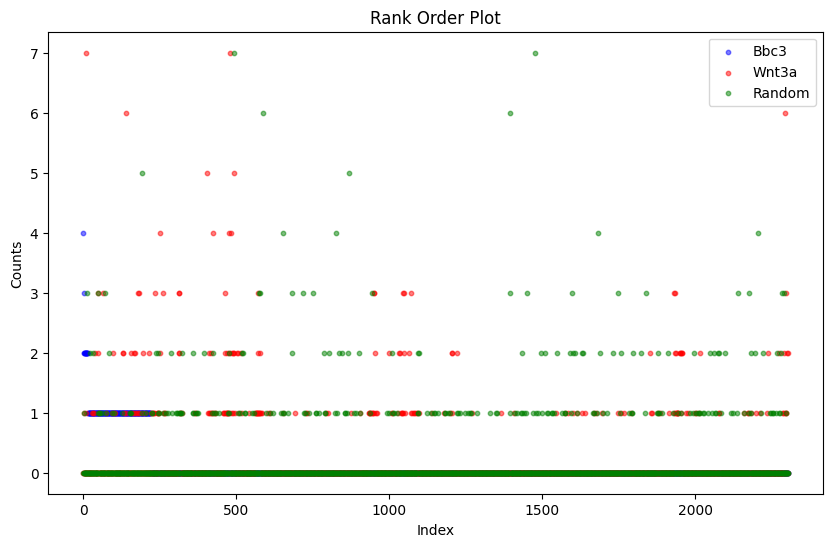

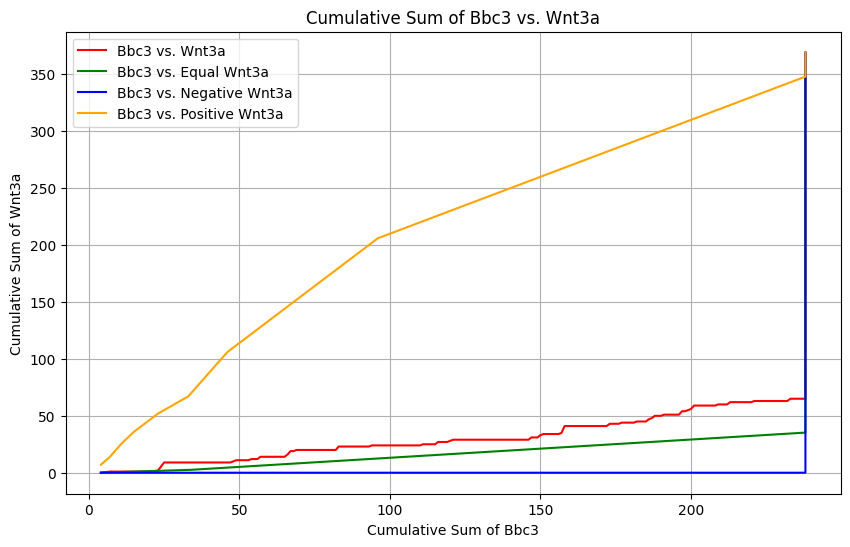

In [10]:
calculator2.plot_rank_orders('Bbc3', 'Wnt3a')

In [11]:
calculator2.compute_pairwise_l_metrics()
# Perform hierarchical clustering using the average linkage method and Euclidean distance
calculator2.perform_clustering(method='average', metric='euclidean')

# Plot the interactive clustered heatmap
calculator2.plot_heatmap(interactive=True)

Computing Pairwise L-Metrics: 100%|██████████| 47742/47742 [00:32<00:00, 1454.86it/s]
